# Nettoyage des données

Idée d'application:

Manger le plus sainement possible avec des produits locaux


Définition des variables sur le site d' [Open Food Facts](https://world.openfoodfacts.org/data/data-fields.txt)

Démarche:

1. S'informer sur les variables
2. Trouver une idée d'application
3. Filtrer les variables en fonction de mon application
4. Première analyse des variables:
    1. Traitement des valeurs aberrantes
    2. Traitement des valeurs manquantes


Importation du csv et aperçu du dataset

Utilisation de Dask plutot que Pandas pour le premier aperçu pour un gain de performance


Ajout du paramètre "dtype" à posteriori sur les colonnes suite à l'affichage d'une erreur de lecture du type de donnée

Cellule précendante effacée car impossibilité de lancer le script en entier sinon

In [1]:
import dask.dataframe as dd

datas = dd.read_csv("en.openfoodfacts.org.products.csv", sep="\t", parse_dates=[4, 6], encoding="utf-8",
dtype={'brand_owner': 'object', 'code': 'object', 'generic_name': 'object', 'ingredients_from_palm_oil_tags': 'object',
       'ingredients_that_may_be_from_palm_oil_tags': 'object', 'origins': 'object', 'origins_en': 'object', 'origins_tags': 'object',
       'packaging_text': 'object', 'traces': 'object', 'traces_en': 'object', 'traces_tags': 'object', 'additives_en': 'object',
       'additives_tags': 'object', 'cities_tags': 'object', 'emb_codes': 'object', 'emb_codes_tags': 'object',
       'first_packaging_code_geo': 'object', 'manufacturing_places': 'object', 'manufacturing_places_tags': 'object',
       'packaging': 'object', 'packaging_tags': 'object', 'purchase_places': 'object', 'serving_size': 'object', 'additives': 'object', 
       'abbreviated_product_name': 'object'})
#pd.set_option("display.max_columns", None)
datas.head(10)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16 14:53:28+00:00,1623855209,2021-06-16 14:53:29+00:00,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15 10:38:00+00:00,1561463718,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13 21:06:14+00:00,1539464817,2018-10-13 21:06:57+00:00,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19 15:02:16+00:00,1574175737,2019-11-19 15:02:17+00:00,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27 05:38:15+00:00,1619501897,2021-04-27 05:38:17+00:00,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11 14:09:21+00:00,1444659212,2015-10-12 14:13:32+00:00,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08 18:56:13+00:00,1560020173,2019-06-08 18:56:13+00:00,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31 17:53:02+00:00,1535737986,2018-08-31 17:53:06+00:00,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17 12:05:32+00:00,1542456333,2018-11-17 12:05:33+00:00,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07 18:34:40+00:00,1544207683,2018-12-07 18:34:43+00:00,Pistou d'ail des ours,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analyse des colonnes 27, 28, 29, 31 suite au warning

In [2]:
datas.iloc[:, [27, 28, 29, 31]]

,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags
npartitions=65,,,,
,object,object,object,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


Ajout du paramètre "low_memory=False" suite au warning


In [3]:
datas = dd.read_csv("en.openfoodfacts.org.products.csv", sep="\t", parse_dates=[4, 6], encoding="utf-8", low_memory=False,
dtype={'brand_owner': 'object', 'code': 'object', 'generic_name': 'object', 'ingredients_from_palm_oil_tags': 'object',
       'ingredients_that_may_be_from_palm_oil_tags': 'object', 'origins': 'object', 'origins_en': 'object', 'origins_tags': 'object',
       'packaging_text': 'object', 'traces': 'object', 'traces_en': 'object', 'traces_tags': 'object', 'additives_en': 'object',
       'additives_tags': 'object', 'cities_tags': 'object', 'emb_codes': 'object', 'emb_codes_tags': 'object',
       'first_packaging_code_geo': 'object', 'manufacturing_places': 'object', 'manufacturing_places_tags': 'object',
       'packaging': 'object', 'packaging_tags': 'object', 'purchase_places': 'object', 'serving_size': 'object', 'additives': 'object', 
       'abbreviated_product_name': 'object'})

import pandas as pd
pd.set_option("display.max_columns", None)
datas.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16 14:53:28+00:00,1623855209,2021-06-16 14:53:29+00:00,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
datas.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 186 entries, code to carnitine_100g
dtypes: datetime64[ns, UTC](2), object(59), float64(123), int64(2)

Sur 186 colonnes
--------------------
Nombre de colonnes par taux de valeurs nulles:

Entre 0% et 50% de valeurs nulles:
29 colonnes, soit 0.156%
Entre 50% et 75% de valeurs nulles:
21 colonnes, soit 0.113%
Entre 75% et 90% de valeurs nulles:
18 colonnes, soit 0.097%
Entre 90% et 100.001% de valeurs nulles:
118 colonnes, soit 0.634%


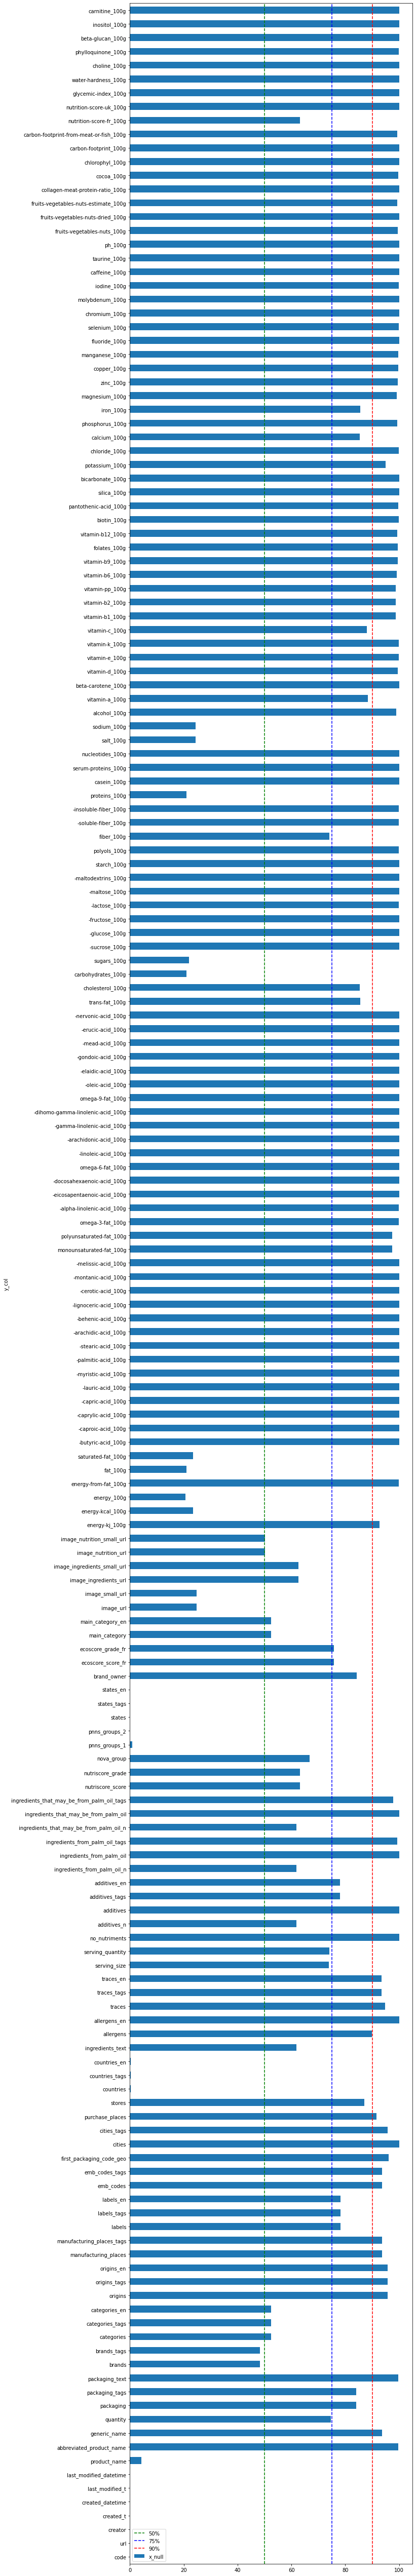

In [10]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

total_length = len(datas.index)

x_null = []
y_col = []

start = time()
for col in datas.columns:
    
    nb_null = datas[col].isnull().sum()
    perc_null = nb_null / total_length * 100

    x_null.append(perc_null)
    y_col.append(col)

tmp_time = time() - start
# print("4/ ", tmp_time)

tab = pd.DataFrame(y_col, columns=["y_col"])
tab["x_null"] = dd.compute(*x_null)

# print("5/ ", time() - start)
# print("5²/ ", time() - tmp_time - start)
len_tab = len(datas.columns)
print(f"Sur {len_tab} colonnes\n{'-'*20}\nNombre de colonnes par taux de valeurs nulles:\n")

list_limit = [0, 50, 75, 90, 100.001]
for i, j in zip(list_limit[:-1], list_limit[1:]):
    nb_columns = tab[(tab["x_null"] >= i) & (tab["x_null"] < j)]["x_null"].count()
    print(f"Entre {i}% et {j}% de valeurs nulles:")
    print(f"{nb_columns} colonnes, soit {round(nb_columns / len_tab * 100, 3)}%")

tab.plot(x = "y_col", y = "x_null", kind= "barh", figsize=(10, int(len(datas.columns)/2)))
plt.axvline(50, linestyle="--" , color="g", label="50%")
plt.axvline(75, linestyle="--" , color="b", label="75%")
plt.axvline(90, linestyle="--" , color="r", label="90%")
plt.legend()
plt.show()

Liste les colonnes

In [6]:
columns = datas.columns

count = 0
liste = ""
for col in columns:
    liste += str(count) + " => " + col + ", "
    count += 1
    if count % 5 == 0:
        liste += "\n"
print(liste)

0 => code, 1 => url, 2 => creator, 3 => created_t, 4 => created_datetime, 
5 => last_modified_t, 6 => last_modified_datetime, 7 => product_name, 8 => abbreviated_product_name, 9 => generic_name, 
10 => quantity, 11 => packaging, 12 => packaging_tags, 13 => packaging_text, 14 => brands, 
15 => brands_tags, 16 => categories, 17 => categories_tags, 18 => categories_en, 19 => origins, 
20 => origins_tags, 21 => origins_en, 22 => manufacturing_places, 23 => manufacturing_places_tags, 24 => labels, 
25 => labels_tags, 26 => labels_en, 27 => emb_codes, 28 => emb_codes_tags, 29 => first_packaging_code_geo, 
30 => cities, 31 => cities_tags, 32 => purchase_places, 33 => stores, 34 => countries, 
35 => countries_tags, 36 => countries_en, 37 => ingredients_text, 38 => allergens, 39 => allergens_en, 
40 => traces, 41 => traces_tags, 42 => traces_en, 43 => serving_size, 44 => serving_quantity, 
45 => no_nutriments, 46 => additives_n, 47 => additives, 48 => additives_tags, 49 => additives_en, 
50 => 

Filtre les variables nécessaires à l'application dans un nouveau dataset

Colonnes voulues (n° d'index):

7, 9, 14, 15, 19, 20, 21, 22, 23, 30, 31, 32, 34, 35, 36, 56, 57, 58, 61, 62, 63, 177, 178


In [7]:
datas_cols = [7, 9, 14, 15, 19, 20, 21, 22, 23, 30, 31, 32, 34, 35, 36, 56, 57, 58, 61, 62, 63, 177, 178]

Le nutriscore est calculé en fonction de la quantité de proteines, de fibres, de "fruit, legumes, noix et huiles", energie, de sucres, de gras saturés et de sodium

Je vais faire un tri pour avoir un aperçu de ce qui m'est proposé


In [8]:
import re

nutri_cols = ""
count = 0
i = 0

for col in datas.columns:
    txt = re.search("protein|fiber|fruit|energy|fat|sodium", col)
    if txt != None:
        nutri_cols += f"{count} => {col}, "
        i += 1
        if i % 5 == 0:
            nutri_cols += f"\n"
    count += 1
    
print(nutri_cols)

75 => energy-kj_100g, 76 => energy-kcal_100g, 77 => energy_100g, 78 => energy-from-fat_100g, 79 => fat_100g, 
80 => saturated-fat_100g, 95 => monounsaturated-fat_100g, 96 => polyunsaturated-fat_100g, 97 => omega-3-fat_100g, 101 => omega-6-fat_100g, 
106 => omega-9-fat_100g, 113 => trans-fat_100g, 125 => fiber_100g, 126 => -soluble-fiber_100g, 127 => -insoluble-fiber_100g, 
128 => proteins_100g, 130 => serum-proteins_100g, 133 => sodium_100g, 169 => fruits-vegetables-nuts_100g, 170 => fruits-vegetables-nuts-dried_100g, 
171 => fruits-vegetables-nuts-estimate_100g, 172 => collagen-meat-protein-ratio_100g, 


Colonne voulue pour le calcul du nutriscore (n° index):

77, 80, 125, 128, 133, 169

In [9]:
datas_cols2 = [77, 80, 125, 128, 133, 169]

In [10]:
import lux
lux.config.sampling = False
lux.config.plotting_scale = 2

nutri_datas = datas.iloc[:, datas_cols2]
nutri_datas_pd = nutri_datas.compute()
nutri_datas_pd

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Une première analyse rapide avec Lux montre que les colonnes choisies sont assez complètes

In [11]:
cols_temp = datas_cols + datas_cols2
cols_temp.sort()
print(cols_temp)

[7, 9, 14, 15, 19, 20, 21, 22, 23, 30, 31, 32, 34, 35, 36, 56, 57, 58, 61, 62, 63, 77, 80, 125, 128, 133, 169, 177, 178]


In [12]:
app_datas = datas.iloc[:, cols_temp]

In [13]:
app_datas.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 29 entries, product_name to nutrition-score-uk_100g
dtypes: object(18), float64(11)

Conversion en pandas


In [14]:
app_datas_pd = app_datas.compute()


Affichage des valeurs des colonnes et leurs nombre d'apparitions pour voir lequelles sont vraiment pertinentes

J'ai fait une première tentative avec value_counts mais je me suis ravisé car ce n'était pas adapté à la majorité de mes variables
et le traitement était extrêmement long... J'ai donc effacé la cellule pour pouvoir avancer

In [15]:
length = len(app_datas_pd.index)



In [16]:
app_datas.describe()

,cities,nutriscore_score,nova_group,energy_100g,saturated-fat_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
npartitions=1,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...


In [17]:
app_datas_pd.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
app_datas_pd.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 1837365 entries, 0 to 16613
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   product_name                 object 
 1   generic_name                 object 
 2   brands                       object 
 3   brands_tags                  object 
 4   origins                      object 
 5   origins_tags                 object 
 6   origins_en                   object 
 7   manufacturing_places         object 
 8   manufacturing_places_tags    object 
 9   cities                       float64
 10  cities_tags                  object 
 11  purchase_places              object 
 12  countries                    object 
 13  countries_tags               object 
 14  countries_en                 object 
 15  nutriscore_score             float64
 16  nutriscore_grade             object 
 17  nova_group                   float64
 18  states                       object 
 19  st

In [19]:
app_datas_pd.head(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

A première vue, \["generic_name", "states", "states_tags", "states_en", "nova_group", "nutrition-score-uk_100g"\] ne sont pas pertinents pour mon projet

D'ailleurs, je ne souhaite garder que le nutriscore_grade qui est celui apparaissant sur les emballages et parlant le plus aux consommateurs

Mon application se basant essentiellement sur le lieu de fabrication des produits pour manger local, je vais me concentrer sur \["manufacturing_places", "manufacturing_places_tags"\] dans un premier temps:

1. Voir la proportion de valeurs nulles
2. Voir les différentes valeurs non nulles et leur nombre d'apparitions. value_counts() devrait être adapté car il ignore les NaN

In [20]:
length = len(app_datas_pd.index)

In [21]:
for col in ["manufacturing_places", "manufacturing_places_tags"]:
    nb_null = app_datas_pd[col].isnull().sum()
    perc_null = nb_null / length * 100

    print(col, ":\n")
    print(f"Valeurs nulles: {nb_null}")
    print(f"% null: {perc_null}")
    print(f"Valeurs non nulles: {length - nb_null}")
    print("\n", "*" *20, "\n")

manufacturing_places :

Valeurs nulles: 1721097
% null: 93.67202488346082
Valeurs non nulles: 116268

 ******************** 

manufacturing_places_tags :

Valeurs nulles: 1721150
% null: 93.6749094491296
Valeurs non nulles: 116215

 ******************** 



In [22]:
import matplotlib.pyplot as plt

for col in ["manufacturing_places", "manufacturing_places_tags"]:
    effectifs = app_datas_pd[col].value_counts()
    
    print(col, ":\n")
    print(effectifs)
    print("\n", "*" *20, "\n")



manufacturing_places :

France                                   24460
Italie                                    2982
Deutschland                               2512
Belgique                                  1763
Suisse                                    1651
                                         ...  
Linck SARL,6 rue Imberty,98000,Monaco        1
Linck sarl,6 rue Imberty,98000,Monaco        1
Haute-Saone                                  1
Fabriqué en France,Gironde                   1
Meppen,Deutschland                           1
Name: manufacturing_places, Length: 26764, dtype: int64

 ******************** 

manufacturing_places_tags :

france                                                              25517
italie                                                               3185
deutschland                                                          2530
belgique                                                             1835
suisse                                               

Je ne vais garder que "manufacturing_places" sur les deux et créer un nouveau dataset sans les colonnes cités précédement et sans les NaN dans "manufacturing_places"

In [23]:
dataset = app_datas_pd[app_datas_pd["manufacturing_places"].isnull() == False]
dataset.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 116268 entries, 63 to 16605
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 115156 non-null  object 
 1   generic_name                 55741 non-null   object 
 2   brands                       114762 non-null  object 
 3   brands_tags                  114754 non-null  object 
 4   origins                      50038 non-null   object 
 5   origins_tags                 49953 non-null   object 
 6   origins_en                   49953 non-null   object 
 7   manufacturing_places         116268 non-null  object 
 8   manufacturing_places_tags    116215 non-null  object 
 9   cities                       0 non-null       float64
 10  cities_tags                  25636 non-null   object 
 11  purchase_places              86630 non-null   object 
 12  countries                    115934 non-null  object 
 13 

In [24]:
cols = [x for x in dataset.columns if x not in ["generic_name", "states", "states_tags", "states_en", "manufacturing_places_tags", "nova_group", "nutrition-score-uk_100g"]]
print(cols)

datasets = dataset.loc[:, cols]
datasets = datasets.reset_index(drop=True)
datasets.info()

['product_name', 'brands', 'brands_tags', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'cities', 'cities_tags', 'purchase_places', 'countries', 'countries_tags', 'countries_en', 'nutriscore_score', 'nutriscore_grade', 'energy_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g']
<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 116268 entries, 0 to 116267
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 115156 non-null  object 
 1   brands                       114762 non-null  object 
 2   brands_tags                  114754 non-null  object 
 3   origins                      50038 non-null   object 
 4   origins_tags                 49953 non-null   object 
 5   origins_en                   49953 non-null   object 
 6   manufacturing_places         1162

In [25]:
datasets.head(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Les colonnes "nutriscore_score" et "nutrition-scire-fr_100g" semblent être sensiblement les mêmes

In [26]:
import numpy as np
length = len(datasets.index)

different = 0
tmp = []

for i in range(length):
    score = 0
    score_100g = 0

    if np.isnan(datasets.at[i, "nutriscore_score"]) == False:
        score = datasets.at[i, "nutriscore_score"]
    if np.isnan(datasets.at[i, "nutrition-score-fr_100g"]) == False:
        score_100g = datasets.at[i, "nutrition-score-fr_100g"]
    
    if score != score_100g:
        different += 1
        tmp.append([i, score, score_100g])

print(f"Il y a {different} / {length} valeurs différentes")
print("Exemple du dernier cas:\n")
print(f"Index: {tmp[-1][0]}")
print(f"Score: {tmp[-1][1]}")
print(f"Score 100g: {tmp[-1][2]}")

Il y a 2 / 116268 valeurs différentes
Exemple du dernier cas:

Index: 114477
Score: 0
Score 100g: 22.0


Je pense garder seulement nutrition-score-fr_100g car les deux seules différences correspondent à la différence de valeurs nulles

Donc autant garder qu'une colonne et la plus complète des deux

In [27]:
count = 0

x_null = []
y_col = []

for col in datasets.columns:
    
    nb_null = datasets[col].isnull().sum()
    perc_null = nb_null / length * 100

    x_null.append(perc_null)
    y_col.append(col)

    print(col, " ", count, ":")
    print("Type: ", datasets[col].dtypes, "\n")
    print(f"Valeurs nulles: {nb_null}")
    print(f"% null: {perc_null}")
    print(f"Valeurs non nulles: {length - nb_null}")
    print("\n", "*" *20, "\n")
    count += 1


product_name   0 :
Type:  object 

Valeurs nulles: 1112
% null: 0.9564110503319916
Valeurs non nulles: 115156

 ******************** 

brands   1 :
Type:  object 

Valeurs nulles: 1506
% null: 1.2952833109712045
Valeurs non nulles: 114762

 ******************** 

brands_tags   2 :
Type:  object 

Valeurs nulles: 1514
% null: 1.302163966009564
Valeurs non nulles: 114754

 ******************** 

origins   3 :
Type:  object 

Valeurs nulles: 66230
% null: 56.963222898819964
Valeurs non nulles: 50038

 ******************** 

origins_tags   4 :
Type:  object 

Valeurs nulles: 66315
% null: 57.03632985860254
Valeurs non nulles: 49953

 ******************** 

origins_en   5 :
Type:  object 

Valeurs nulles: 66315
% null: 57.03632985860254
Valeurs non nulles: 49953

 ******************** 

manufacturing_places   6 :
Type:  object 

Valeurs nulles: 0
% null: 0.0
Valeurs non nulles: 116268

 ******************** 

cities   7 :
Type:  float64 

Valeurs nulles: 116268
% null: 100.0
Valeurs non nul

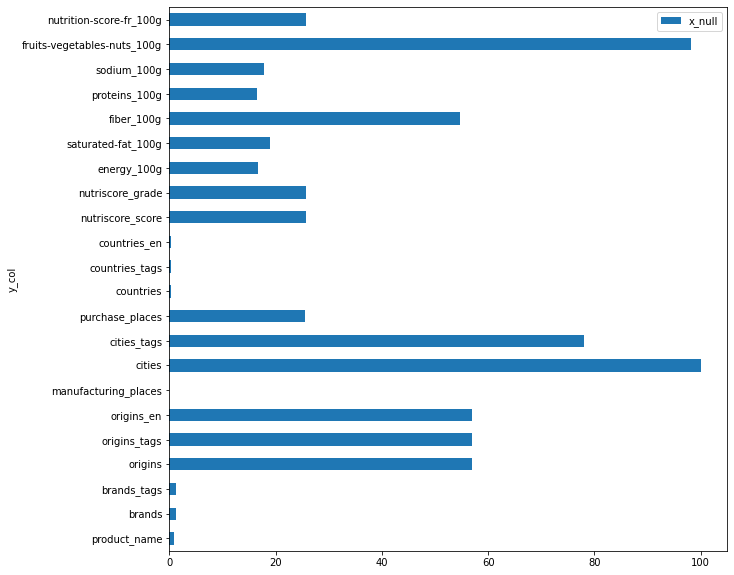

% Max de NaN:  100.0


In [28]:
tab = pd.DataFrame(y_col, columns=["y_col"])
tab["x_null"] = x_null

tab.plot(x = "y_col", y = "x_null", kind= "barh", figsize=(10, 10))
plt.show()

print("% Max de NaN: ", max(x_null))

Au vu des résultat des 3 cellules précédentes, il y a des colonnes redondantes ou qui ont trop de valeurs NaN dont je peux me débarrasser

C'est le cas de \["brands_tags", "origins_tags", "origins_en", "cities", "cities_tags", "countries_tags", "countries_en"\]

In [29]:
cols = [ x for x in datasets.columns if x not in ["brands_tags", "origins_tags", "origins_en", "cities", "cities_tags", "countries_tags", "countries_en", "nutriscore_score", "fruits-vegetables-nuts_100g"]]

final_datas = datasets.loc[:, cols]
final_datas.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Le dataset me convient. Enregistrement et traitement des valeurs aberrantes et manquantes dans un autre notebook

In [30]:
# final_datas.to_csv("PSante_02_app_products.csv", index=False, encoding="utf-8")